<a href="https://colab.research.google.com/github/vivek16pawar/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import plotly.express as px
from datetime import datetime
import datetime as dt

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')

import math
from math import log1p, sqrt 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Module 4/Customers Segmentation/Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Cleaning

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(536641, 8)

In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(401604, 8)

In [ ]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
df["Cancelled_trans"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.Cancelled_trans.value_counts() / df.shape[0] * 100

False    97.790859
True      2.209141
Name: Cancelled_trans, dtype: float64

In [ ]:
df = df.loc[df.Cancelled_trans == False].copy()
df = df.drop('Cancelled_trans',axis = 1)

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df['Amount_spent'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.Amount_spent.describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: Amount_spent, dtype: float64

In [ ]:
df['Year']=df['InvoiceDate'].dt.year
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Hour']=df['InvoiceDate'].dt.hour
df['Minutes']=df['InvoiceDate'].dt.minute
df['Day_of_week'] = df['InvoiceDate'].dt.dayofweek

In [ ]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}

df['Day_of_week'] = df['Day_of_week'].apply(lambda x: days[x])

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,26,Weds
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds


## Exploratory Data Analysis

In [ ]:
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


In [ ]:
df.Country.nunique()

37

In [ ]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(20,5))
px.bar(country_counts ,x = country_counts.index, y = country_counts.values,log_y=True,
       labels={
                     "y": "Transactions",
                     "index": "Countries",
                 },
       title="Which countries made the most transactions?")

<Figure size 1440x360 with 0 Axes>

In [ ]:
# Create feature which indicates inside or outside UK
df["UK"] = np.where(df.Country == "United Kingdom", 1, 0)

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,26,Weds,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,26,Weds,1


Text(0.5, 1.0, 'Yearly Transactions Count')

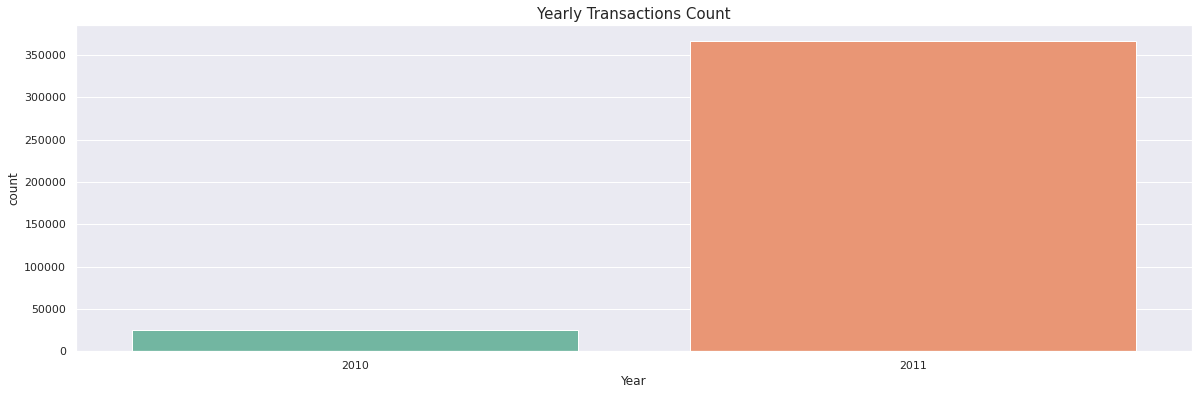

In [ ]:
plt.figure(figsize = (20,6))
sns.set_style('darkgrid')
sns.countplot(df.Year,palette='Set2')
plt.title('Yearly Transactions Count',fontsize=15)

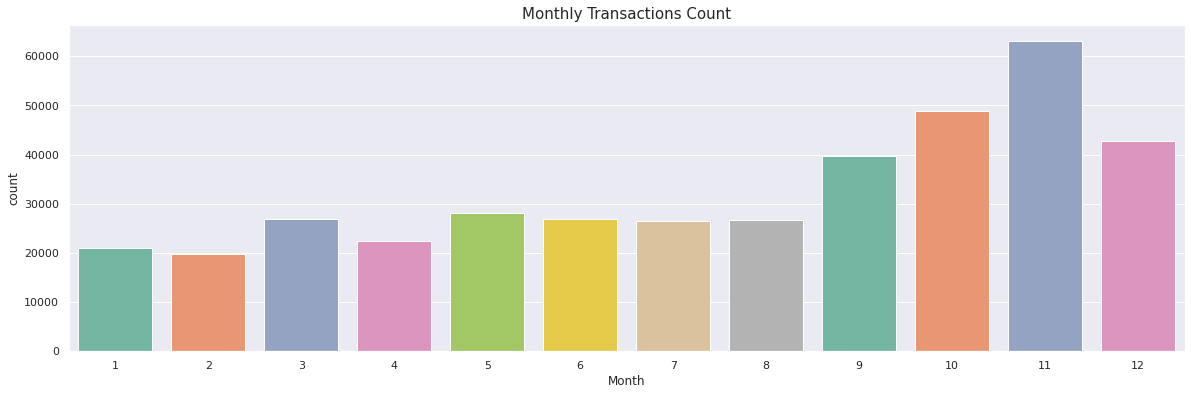

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df.Month, palette='Set2')
plt.title('Monthly Transactions Count',fontsize=15);

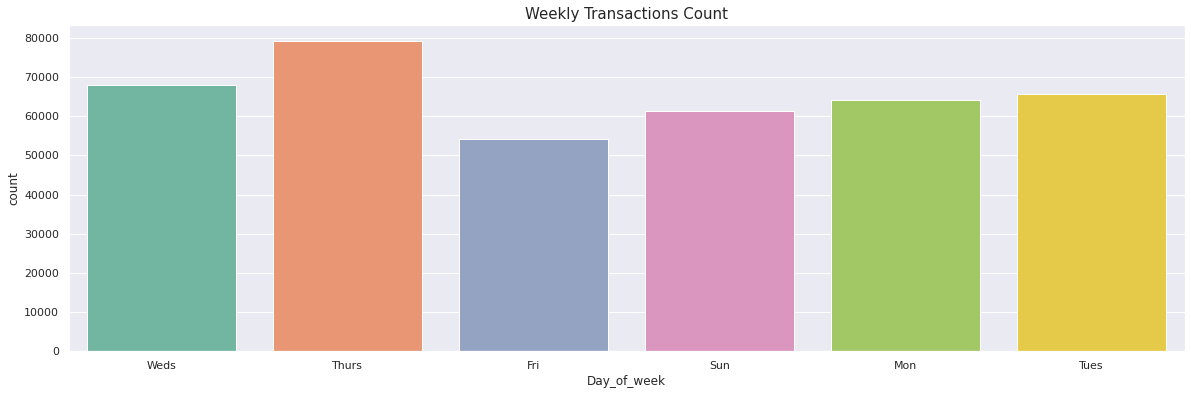

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df.Day_of_week, palette='Set2')
plt.title('Weekly Transactions Count',fontsize=15);

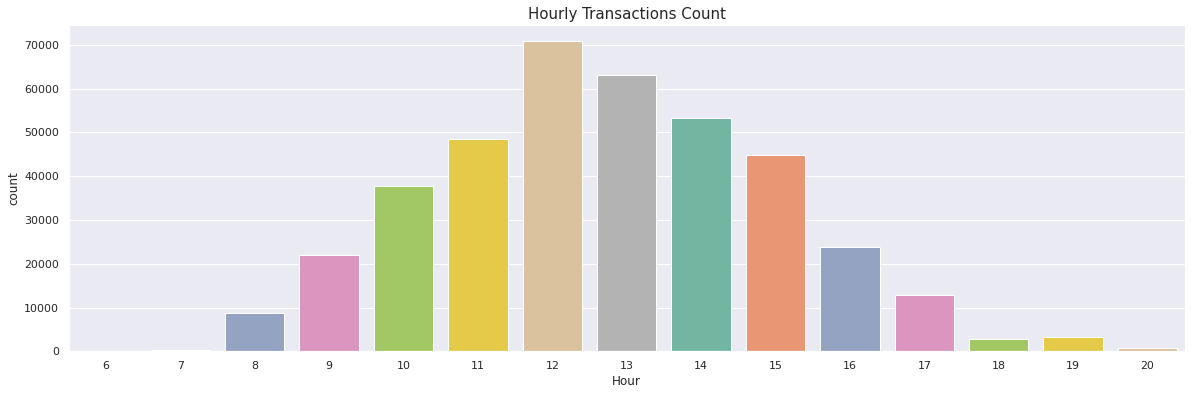

In [ ]:
plt.figure(figsize = (20,6))
sns.countplot(df.Hour, palette='Set2')
plt.title('Hourly Transactions Count',fontsize=15);

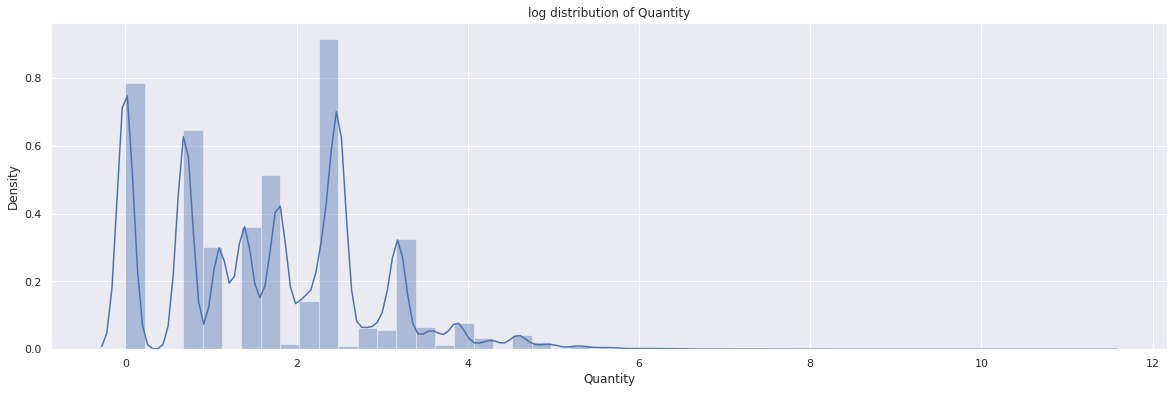

In [ ]:
plt.figure(figsize=(20,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))

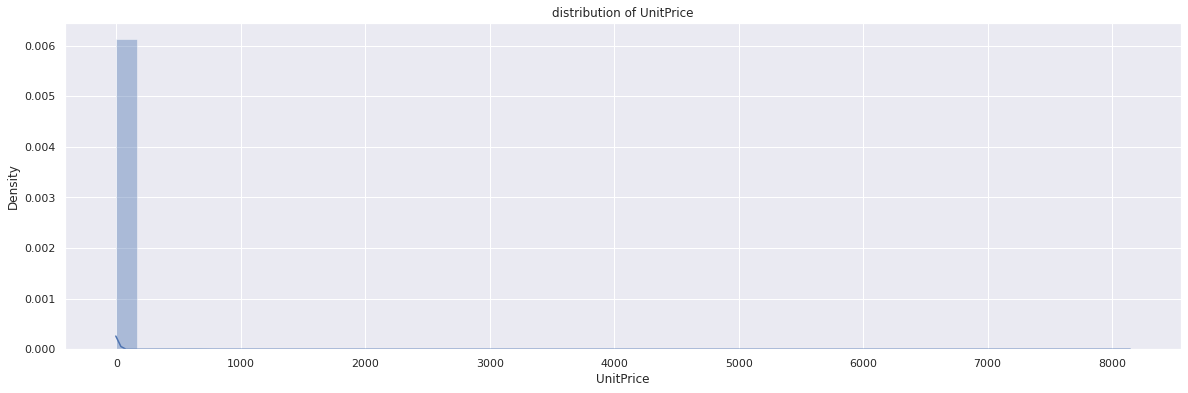

In [ ]:
plt.figure(figsize=(20,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B");

## Prepare Data

As customer clusters may vary by geography, I’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [ ]:
# Restricting analysis to UK
retail_uk = df[df['Country']=='United Kingdom']
#check the shape
retail_uk.shape

(349227, 16)

In [ ]:
#restrict the data to one full year because it's better to use a metric per Months or Years in RFM
retail_uk = retail_uk[retail_uk['InvoiceDate']>= "2010-12-09"]
retail_uk.shape

(337670, 16)

In [ ]:
pd.DataFrame([{'products': len(retail_uk['StockCode'].value_counts()),    
               'transactions': len(retail_uk['InvoiceNo'].value_counts()),
               'customers': len(retail_uk['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3611,16017,3863


In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int64')

## RFM Analysis

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.

### Recency

In [ ]:
#last date available in our dataset
retail_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

The last date we have is 2011-12-09 so we will use it as reference.

In [ ]:
# Taking last date as reference
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [ ]:
# Creating new coumn containing only date
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [ ]:
retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,47.4,2010,12,9,8,34,Thurs,1,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,37.2,2010,12,9,8,34,Thurs,1,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,15.3,2010,12,9,8,34,Thurs,1,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,31.8,2010,12,9,8,34,Thurs,1,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,15.9,2010,12,9,8,34,Thurs,1,2010-12-09


In [ ]:
# Creating recency dataframe
recency = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurshaceDate']
recency.head()

,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


In [ ]:
recency.shape

(3863, 2)

In [ ]:
#calculating recency
recency['Recency'] = recency['LastPurshaceDate'].apply(lambda x: (now - x).days)

In [ ]:
recency.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


In [ ]:
#droping LastPurchaseDate 
recency.drop('LastPurshaceDate',axis=1,inplace=True)

### Frequency

In [ ]:
#calculate frequency of purchases
frequency = retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,96
2,12748.0,4063
3,12749.0,199
4,12820.0,59


### Monetary

In [ ]:
# Amount Spent Columns
retail_uk.Amount_spent

19632      47.4
19633      37.2
19634      15.3
19635      31.8
19636      15.9
          ...  
541889     23.4
541890     23.6
541891     30.0
541892    214.8
541893     70.8
Name: Amount_spent, Length: 337670, dtype: float64

In [ ]:
# Creating Monetary Column
monetary = retail_uk.groupby(by='CustomerID',as_index=False).agg({'Amount_spent': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,3837.45
2,12748.0,31217.94
3,12749.0,4090.88
4,12820.0,942.34


In [ ]:
#merge recency with frequency 
rf_merge = recency.merge(frequency,on='CustomerID')
rf_merge.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,96
2,12748.0,0,4063
3,12749.0,3,199
4,12820.0,3,59


In [ ]:
#merge with monetary dataframe to get a table with the 3 columns
rfm = rf_merge.merge(monetary,on='CustomerID')

### RFM Quartiles

In [ ]:
# assign a score from 1 to 4 to Recency, Frequency and Monetary
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14200.0,17.0,17.0,293.05
0.50,15561.0,49.0,40.0,639.02
0.75,16911.0,134.0,96.0,1548.75


In [ ]:
# convert to dict
quantiles.to_dict()

{'CustomerID': {0.25: 14200.0, 0.5: 15561.0, 0.75: 16911.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 96.0},
 'Monetary': {0.25: 293.05, 0.5: 639.02, 0.75: 1548.75},
 'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 134.0}}

### Creation of RFM Segments

In [ ]:
# RScore creation
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
# FM Score creation
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
#create rfm segmentation 
segmentation = rfm

In [ ]:
# Creating Recency Quartile
segmentation['R_Quartile'] = segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))

In [ ]:
# Creating Frequency Quartile
segmentation['F_Quartile'] = segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))

In [ ]:
# Creating Monetary Quartile
segmentation['M_Quartile'] = segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [ ]:
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346.0,325,1,77183.60,1,1,4
1,12747.0,2,96,3837.45,4,3,4
2,12748.0,0,4063,31217.94,4,4,4
3,12749.0,3,199,4090.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [ ]:
segmentation.shape

(3863, 7)

In [ ]:
#  Adding all quartile to create rfm score
segmentation['RFM Group'] = segmentation.R_Quartile.map(str) \
                            + segmentation.F_Quartile.map(str) \
                            + segmentation.M_Quartile.map(str)
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group
0,12346.0,325,1,77183.60,1,1,4,114
1,12747.0,2,96,3837.45,4,3,4,434
2,12748.0,0,4063,31217.94,4,4,4,444
3,12749.0,3,199,4090.88,4,4,4,444
4,12820.0,3,59,942.34,4,3,3,433


In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
segmentation['RFMScore'] = segmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12747.0,2,96,3837.45,4,3,4,434,11
2,12748.0,0,4063,31217.94,4,4,4,444,12
3,12749.0,3,199,4090.88,4,4,4,444,12
4,12820.0,3,59,942.34,4,3,3,433,10


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

In [ ]:
# Getting our best customers
segmentation[segmentation['RFMScore']== 12].sort_values('Monetary', ascending=False).head(10)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Group,RFMScore
3729,18102.0,0,414,233736.93,4,4,4,444,12
3272,17450.0,8,333,192361.95,4,4,4,444,12
3314,17511.0,2,920,87591.70,4,4,4,444,12
2731,16684.0,4,277,66653.56,4,4,4,444,12
894,14096.0,4,5111,65164.79,4,4,4,444,12
615,13694.0,3,562,64197.50,4,4,4,444,12
1752,15311.0,0,2282,59296.04,4,4,4,444,12
2087,15769.0,7,129,56160.92,4,4,4,444,12
188,13089.0,2,1773,55531.46,4,4,4,444,12
1034,14298.0,8,1637,51527.30,4,4,4,444,12


In [ ]:
print("Best Customers: ",len(segmentation[segmentation['RFM Group']=='444']))
print('Loyal Customers: ',len(segmentation[segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(segmentation[segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(segmentation[segmentation['RFM Group']=='244']))
print('Lost Customers: ',len(segmentation[segmentation['RFM Group']=='144']))
print('Lost Cheap Customers: ',len(segmentation[segmentation['RFM Group']=='111']))

Best Customers:  404
Loyal Customers:  961
Big Spenders:  966
Almost Lost:  96
Lost Customers:  18
Lost Cheap Customers:  337


In [ ]:
segmentation.drop(['R_Quartile', 'F_Quartile','M_Quartile'], axis=1,inplace = True)

## Model Preparation

Text(0.5, 0, 'Attributes')

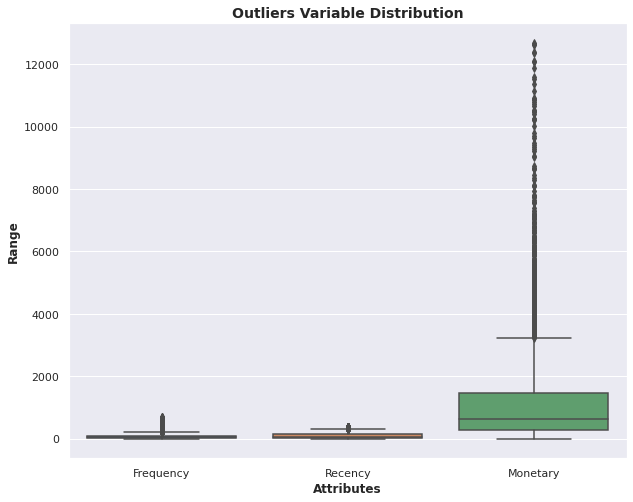

In [ ]:
attributes = ['Frequency', 'Recency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmentation[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Amount
Q1 = segmentation['Monetary'].quantile(0.05)
Q3 = segmentation['Monetary'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Monetary'] >= Q1 - 1.5*IQR) & (segmentation['Monetary'] <= Q3 + 1.5*IQR)]

Q1 = segmentation['Frequency'].quantile(0.05)
Q3 = segmentation['Frequency'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Frequency'] >= Q1 - 1.5*IQR) & (segmentation['Frequency'] <= Q3 + 1.5*IQR)]


Q1 = segmentation['Recency'].quantile(0.05)
Q3 = segmentation['Recency'].quantile(0.95)
IQR = Q3 - Q1
segmentation = segmentation[(segmentation['Recency'] >= Q1 - 1.5*IQR) & (segmentation['Recency'] <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

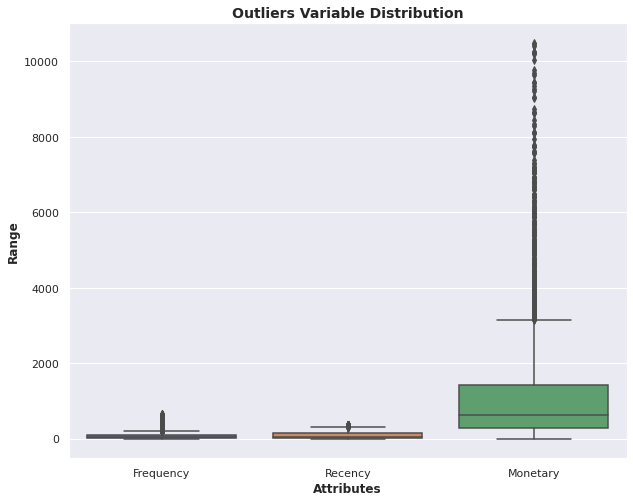

In [ ]:
attributes = ['Frequency', 'Recency', 'Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmentation[attributes])
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
#Handle negative and zero values
def neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply neg_n_zero function to Recency and Monetary columns 
segmentation['Recency'] = [neg_n_zero(x) for x in segmentation.Recency]
segmentation['Monetary'] = [neg_n_zero(x) for x in segmentation.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = segmentation[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

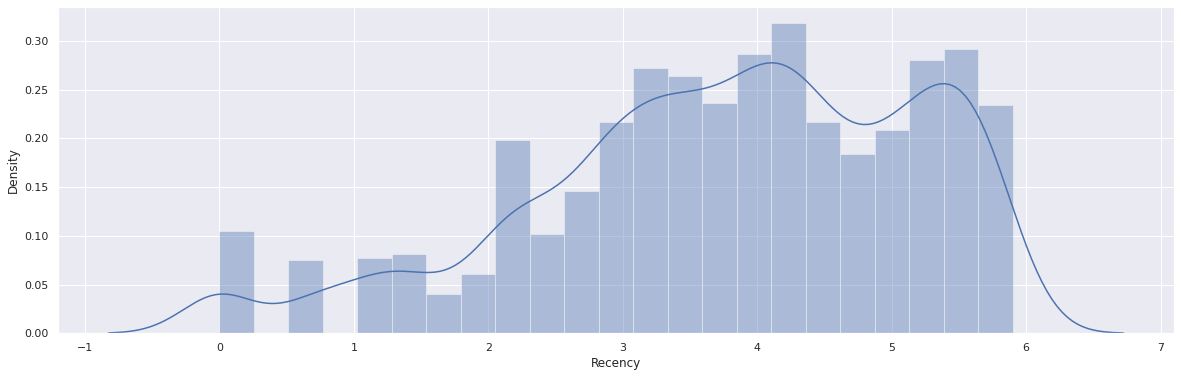

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(20,6))
sns.distplot(Recency_Plot);

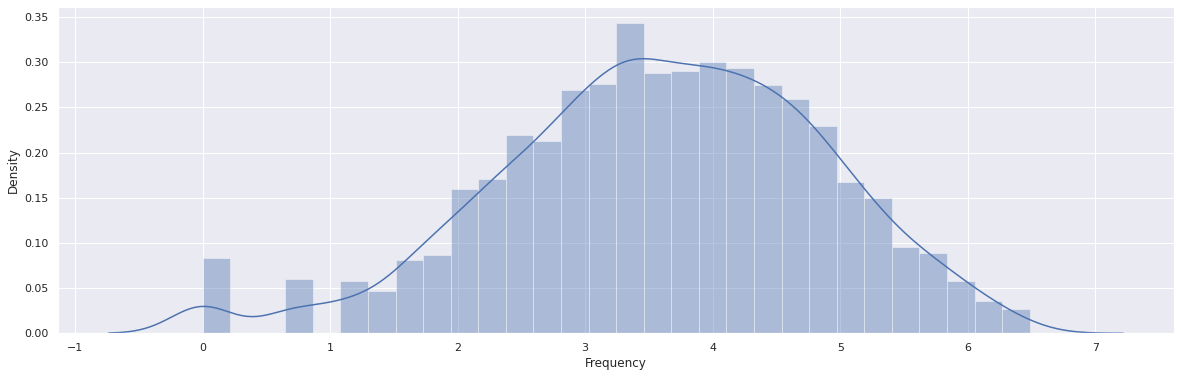

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(20,6))
sns.distplot(Frequency_Plot);

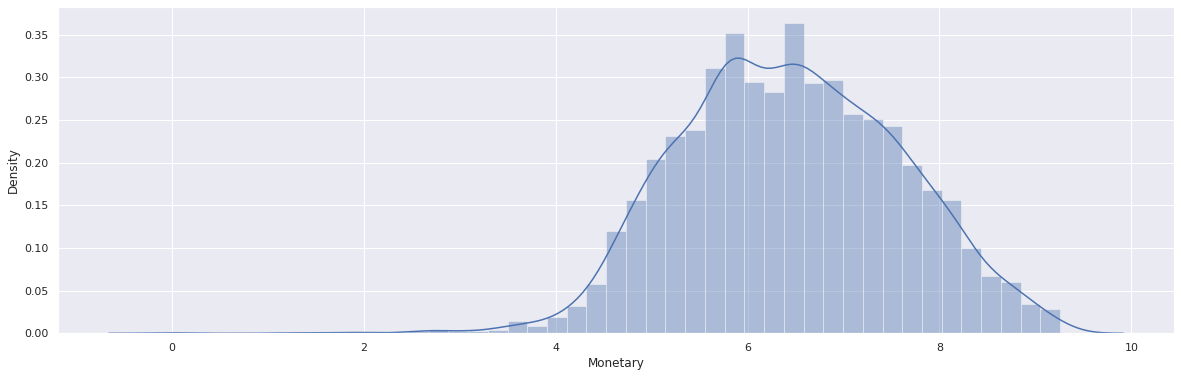

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(20,6))
sns.distplot(Monetary_Plot);

In [ ]:
from sklearn import preprocessing
segmentation['Recency_log'] = segmentation['Recency'].apply(math.log)
segmentation['Frequency_log'] = segmentation['Frequency'].apply(math.log)
segmentation['Monetary_log'] = segmentation['Monetary'].apply(math.log)

## Model

- Applying Silhouette Score Method on Recency and Monetary

In [ ]:
# Scaling input data 
features_rm=['Recency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [ ]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.41511459574517084
For n_clusters = 3, silhouette score is 0.34597560126079313
For n_clusters = 4, silhouette score is 0.3643756684044303
For n_clusters = 5, silhouette score is 0.34101246091820614
For n_clusters = 6, silhouette score is 0.3469560007675166
For n_clusters = 7, silhouette score is 0.33747447974291656
For n_clusters = 8, silhouette score is 0.34505603239069316
For n_clusters = 9, silhouette score is 0.35167451369439945
For n_clusters = 10, silhouette score is 0.34350801011093973
For n_clusters = 11, silhouette score is 0.3481936292567664
For n_clusters = 12, silhouette score is 0.35163069078239095
For n_clusters = 13, silhouette score is 0.34846348189280935
For n_clusters = 14, silhouette score is 0.3483886999799432
For n_clusters = 15, silhouette score is 0.34731187731692553


- Applying Elbow Method on Recency and Monetary

In [ ]:
# Scaling input data for silhouette score
features_rm=['Recency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

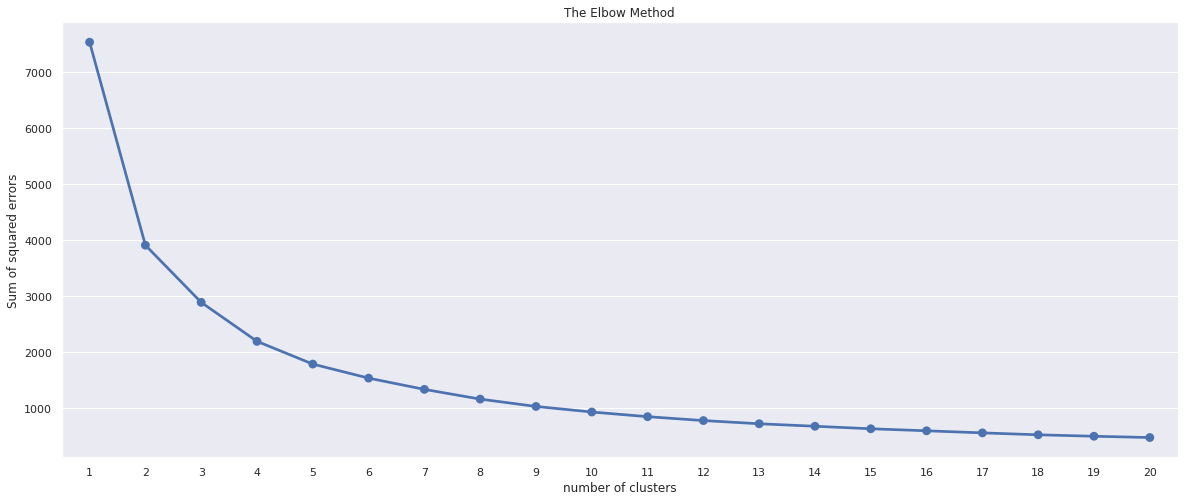

In [ ]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [ ]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

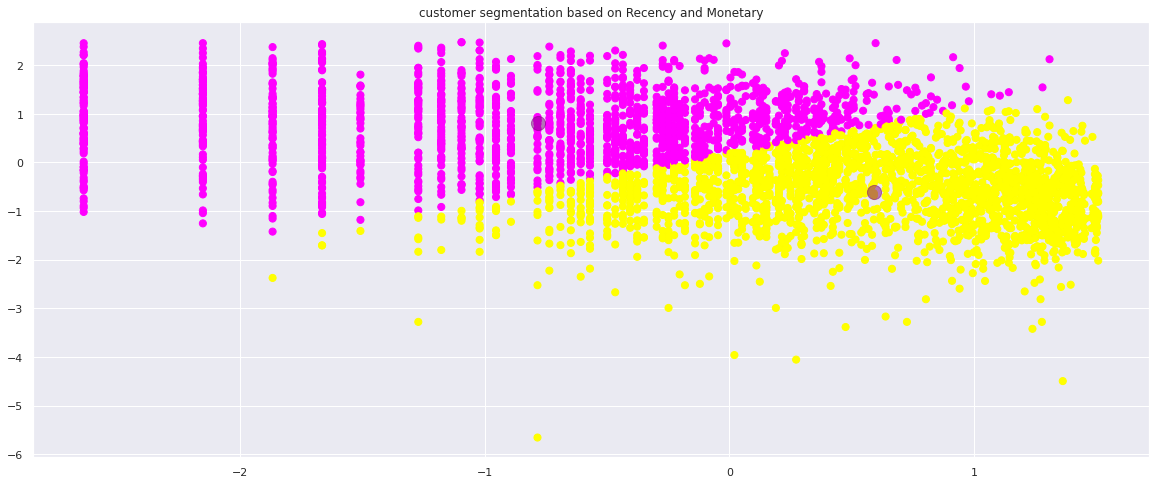

In [ ]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

- Applying Silhouette Score Method on Frequency and Monetary

In [ ]:
# Scaling input data 
features_rm=['Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [ ]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4817520125234911
For n_clusters = 3, silhouette score is 0.4088778696097729
For n_clusters = 4, silhouette score is 0.3717633042333461
For n_clusters = 5, silhouette score is 0.3401976376097799
For n_clusters = 6, silhouette score is 0.36487899620146774
For n_clusters = 7, silhouette score is 0.3332324718729326
For n_clusters = 8, silhouette score is 0.3491218811286045
For n_clusters = 9, silhouette score is 0.35964372293309715
For n_clusters = 10, silhouette score is 0.3525843210978691
For n_clusters = 11, silhouette score is 0.3598970485942363
For n_clusters = 12, silhouette score is 0.3686606162154565
For n_clusters = 13, silhouette score is 0.3727470731294531
For n_clusters = 14, silhouette score is 0.35471294115100827
For n_clusters = 15, silhouette score is 0.36308131815173145


- Applying Elbow Method on Frequency and Monetary

In [ ]:
# Scaling input data for silhouette score
features_rm=['Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

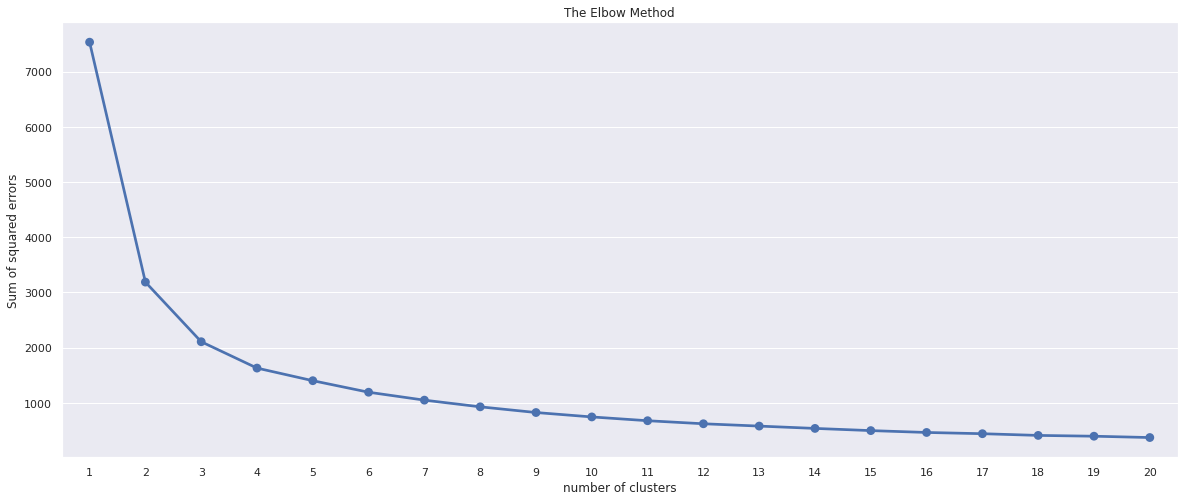

In [ ]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [ ]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

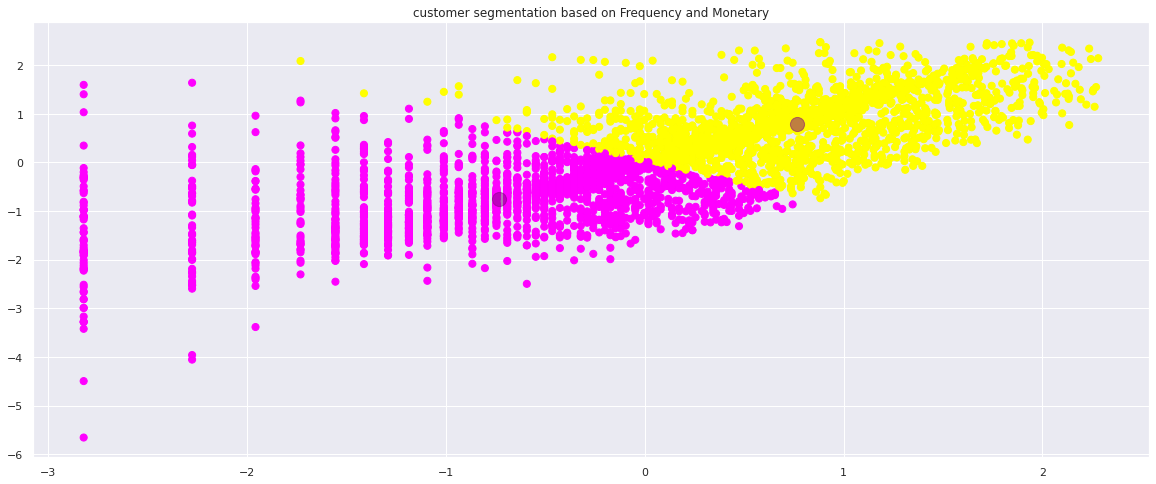

In [ ]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

- Applying silhouette score method on Recency, Frequency and Monetary

In [ ]:
# Scaling input data for silhouette score
features_rm=['Recency_log','Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

In [ ]:
# Appling K means Algorithm and checking its silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, max_iter=50)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39211598727455854
For n_clusters = 3, silhouette score is 0.2920688200697209
For n_clusters = 4, silhouette score is 0.2956449390514747
For n_clusters = 5, silhouette score is 0.2815350332494705
For n_clusters = 6, silhouette score is 0.2585324025057352
For n_clusters = 7, silhouette score is 0.26558443232808987
For n_clusters = 8, silhouette score is 0.26820484431527614
For n_clusters = 9, silhouette score is 0.268156181527552
For n_clusters = 10, silhouette score is 0.2772323154290872
For n_clusters = 11, silhouette score is 0.2695446688728109
For n_clusters = 12, silhouette score is 0.26690783945561986
For n_clusters = 13, silhouette score is 0.2627855366728601
For n_clusters = 14, silhouette score is 0.2573631797939954
For n_clusters = 15, silhouette score is 0.2576070343142489


For n_clusters = 2 The average silhouette_score is : 0.39211598727455854
For n_clusters = 3 The average silhouette_score is : 0.2919584123611574
For n_clusters = 4 The average silhouette_score is : 0.2957567776264801
For n_clusters = 5 The average silhouette_score is : 0.28151520854093587
For n_clusters = 6 The average silhouette_score is : 0.25815526421869855
For n_clusters = 7 The average silhouette_score is : 0.26460041039410925
For n_clusters = 8 The average silhouette_score is : 0.2690770496314174
For n_clusters = 9 The average silhouette_score is : 0.26801778002349674
For n_clusters = 10 The average silhouette_score is : 0.27689112078032424


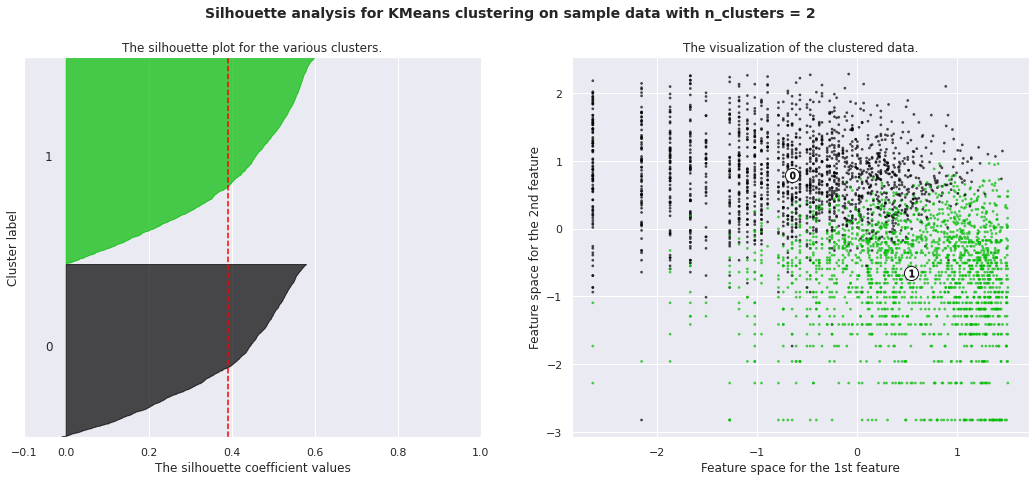

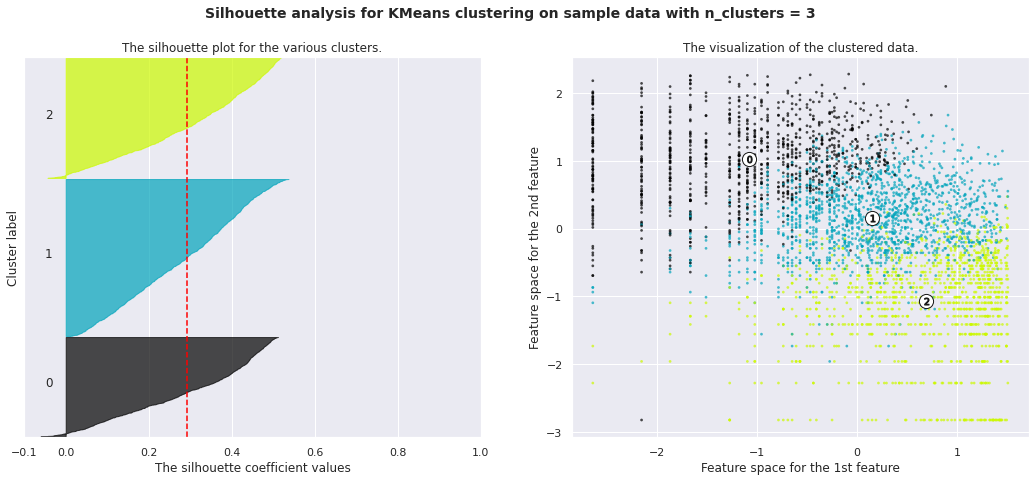

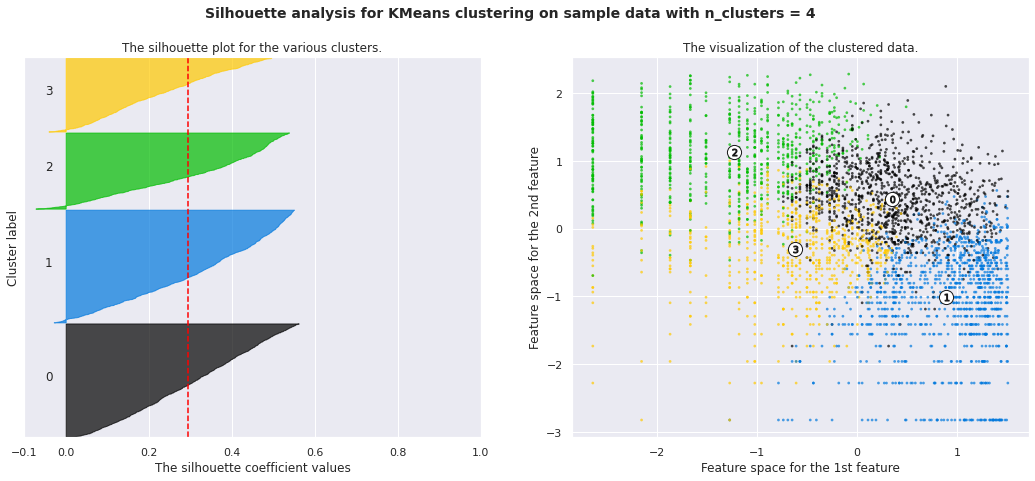

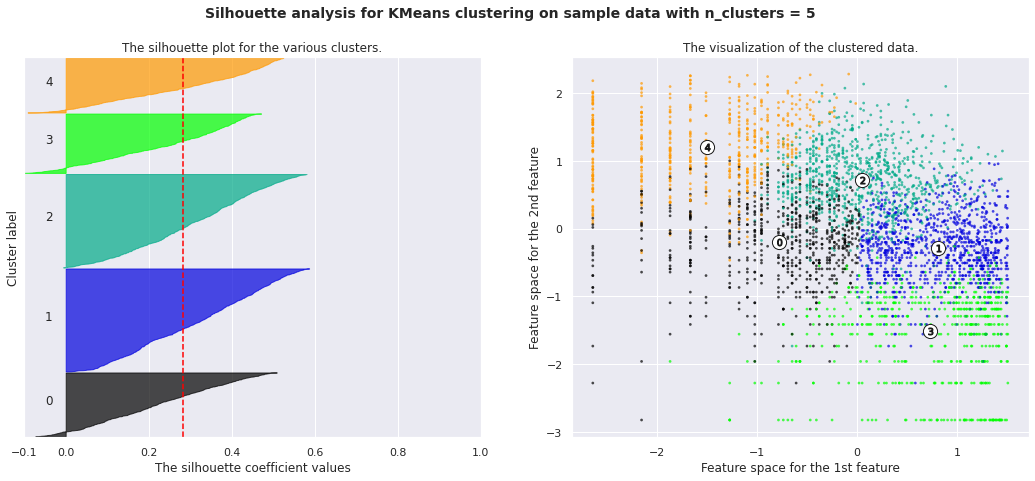

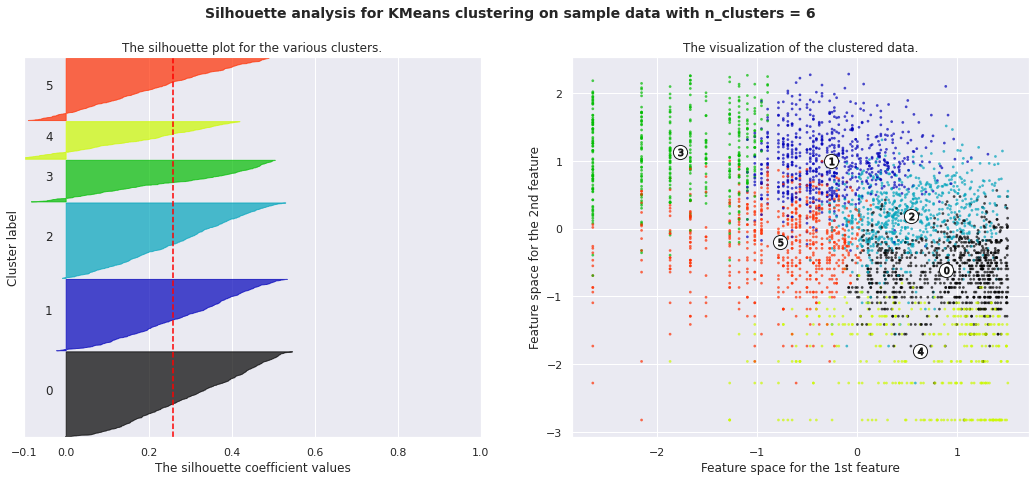

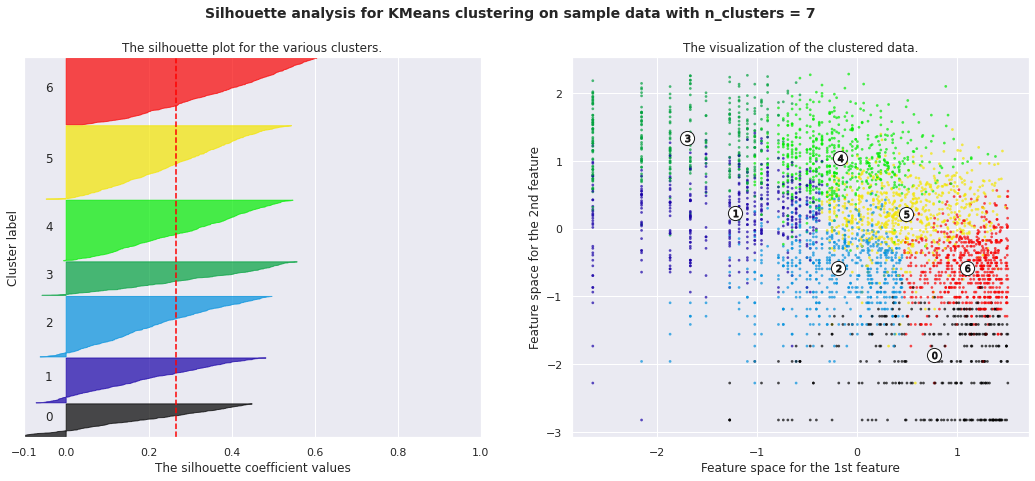

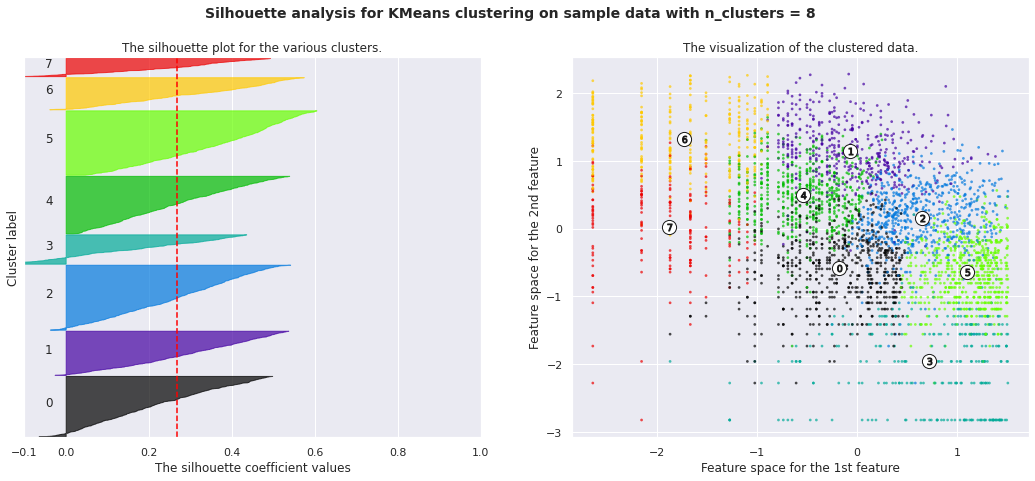

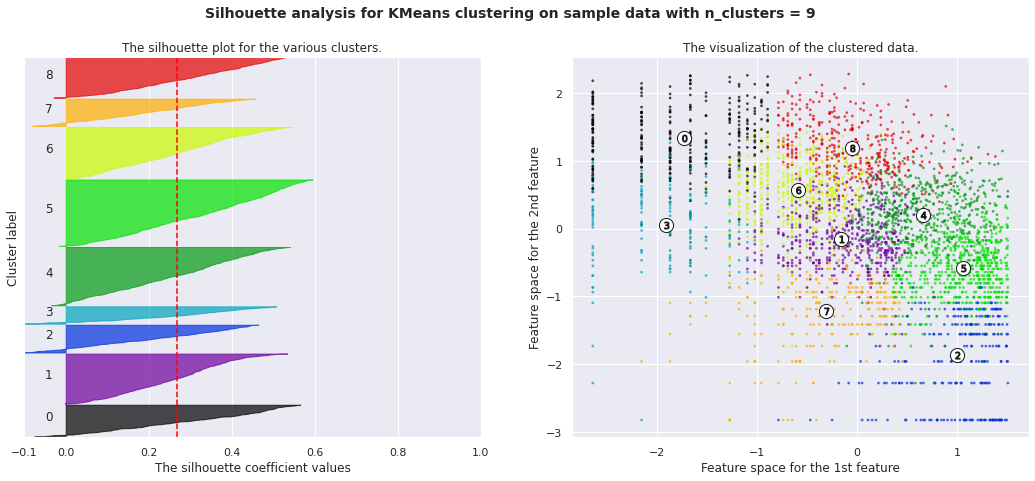

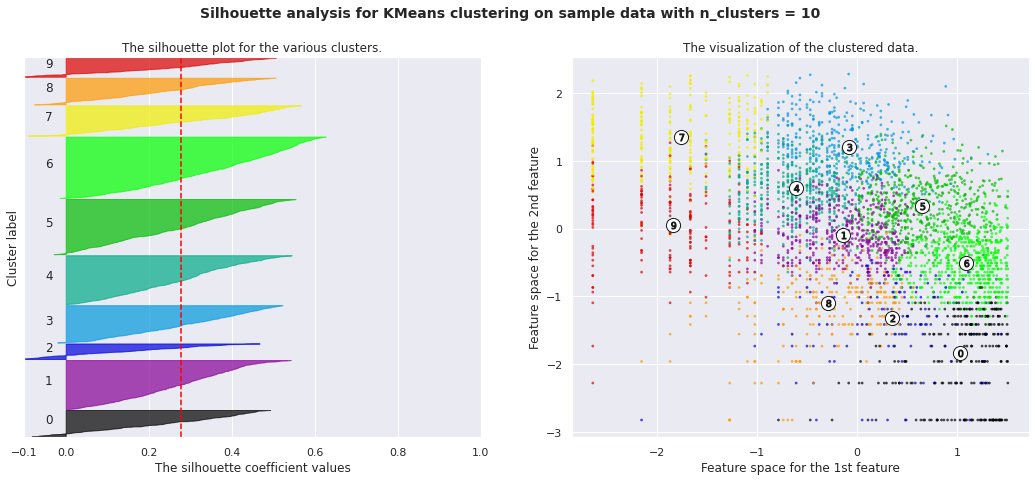

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10,max_iter = 50)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

- Applying Elbow method on Recency, Frequency and Monetary

In [ ]:
# Scaling input data for Elbow Method
features_rm=['Recency_log','Frequency_log','Monetary_log']
X_features_rm=segmentation[features_rm].values
scaler_rec_mon=preprocessing.StandardScaler()
X_rm=scaler_rec_mon.fit_transform(X_features_rm)
X = X_rm

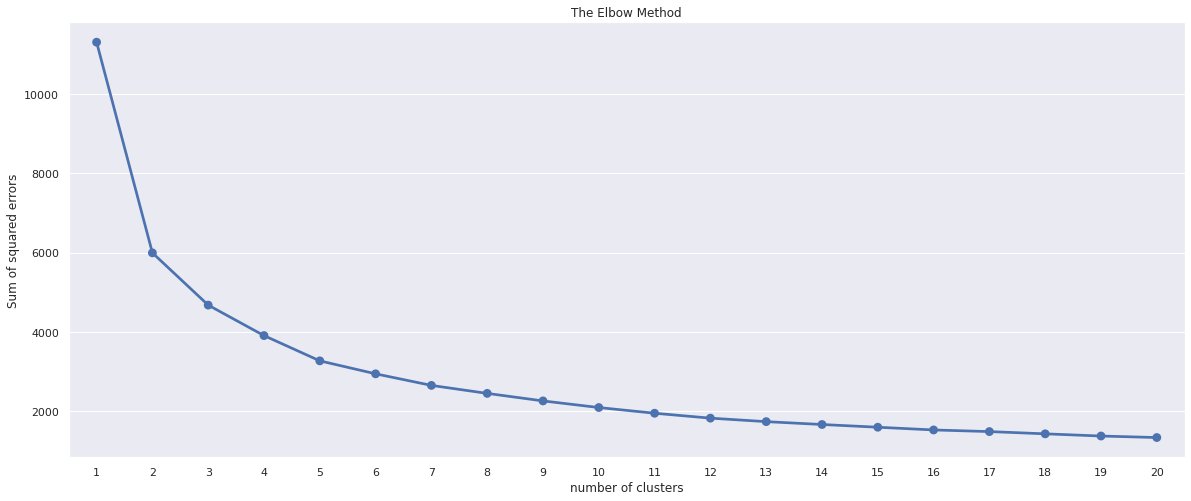

In [ ]:
# Elbow-curve/SSD
wcss = {}
# Fit KMeans and calculate SSE for each k
for k in range(1,21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1, max_iter=50)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(X)
    
    # Assign sum of squared distances to k element of dictionary
    wcss[k] = kmeans.inertia_
# Plotting the elbow plot
plt.figure(figsize=(20,8))
plt.title('The Elbow Method')
plt.xlabel('number of clusters'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))
plt.show()

In [ ]:
# Using number of cluster as 2 for customer segmentation
kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

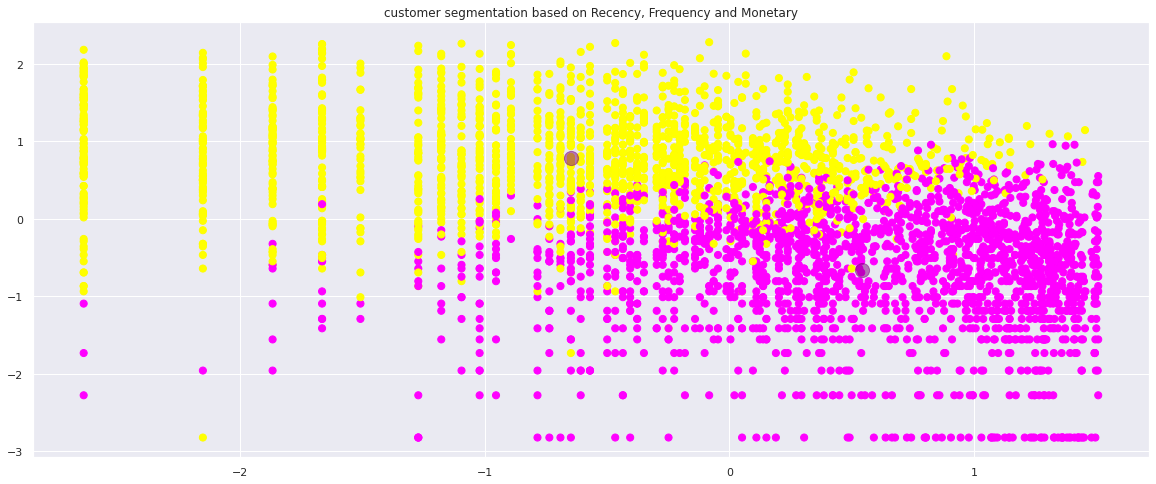

In [ ]:
# Plotting the cluster scatter plot
plt.figure(figsize=(20,8))
plt.title('customer segmentation based on Recency, Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

In [ ]:
# Creating Cluster Number column
segmentation['ClusterNo'] = kmeans.labels_

In [ ]:
# Getting first 5 rows of segmentation
segmentation.head()

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,1
3,12749.0,3,199,4090.88,444,12,1.098612,5.293305,8.316515,1
4,12820.0,3,59,942.34,433,10,1.098612,4.077537,6.848366,1
5,12821.0,214,6,92.72,111,3,5.365976,1.791759,4.529584,0
6,12822.0,70,46,948.88,233,8,4.248495,3.828641,6.855282,1


In [ ]:
# Value count how many customers are present in each cluster
segmentation['ClusterNo'].value_counts()

0    2047
1    1720
Name: ClusterNo, dtype: int64

In [ ]:
# Merging segmenatation and main dataframe
merge_df = segmentation.merge(df,on='CustomerID')
merge_df.head()

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,...,UnitPrice,Country,Amount_spent,Year,Month,Day,Hour,Minutes,Day_of_week,UK
0,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,1,...,2.55,United Kingdom,30.60,2010,12,5,15,38,Sun,1
1,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,1,...,2.55,United Kingdom,15.30,2010,12,5,15,38,Sun,1
2,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,1,...,1.69,United Kingdom,27.04,2010,12,5,15,38,Sun,1
3,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,1,...,1.65,United Kingdom,39.60,2010,12,5,15,38,Sun,1
4,12747.0,2,96,3837.45,434,11,0.693147,4.564348,8.252563,1,...,5.45,United Kingdom,32.70,2010,12,5,15,38,Sun,1


## Cluster 0 Analysis

In [ ]:
# Getting rows with cluster 0
segmentation[segmentation['ClusterNo']==0]

,CustomerID,Recency,Frequency,Monetary,RFM Group,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo
5,12821.0,214,6,92.72,111,3,5.365976,1.791759,4.529584,0
7,12823.0,74,5,1759.50,214,7,4.304065,1.609438,7.472785,0
8,12824.0,59,25,397.12,222,6,4.077537,3.218876,5.984239,0
12,12829.0,336,11,293.00,111,3,5.817111,2.397895,5.680173,0
14,12831.0,262,9,215.05,111,3,5.568345,2.197225,5.370871,0
...,...,...,...,...,...,...,...,...,...,...
3856,18277.0,58,8,110.38,211,4,4.060443,2.079442,4.703929,0
3857,18278.0,73,9,173.90,211,4,4.290459,2.197225,5.158480,0
3858,18280.0,277,10,180.60,111,3,5.624018,2.302585,5.196285,0
3859,18281.0,180,7,80.82,111,3,5.192957,1.945910,4.392224,0


In [ ]:
# reset index of merge dataframe
temp = merge_df.reset_index()

In [ ]:
# customer id of cluster 0
cust0 = list(temp[temp['ClusterNo']==0]['CustomerID'])

In [ ]:
# Cluster 0 info
cluster0 = merge_df[merge_df['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice','Amount_spent', 'Frequency', 'Recency'
         , 'Monetary']].mean()

Quantity         10.877266
UnitPrice         3.244239
Amount_spent     17.031600
Frequency        37.330642
Recency         134.953913
Monetary        443.909342
dtype: float64

In [ ]:
cluster0.describe()

,CustomerID,Recency,Frequency,Monetary,RFMScore,Recency_log,Frequency_log,Monetary_log,ClusterNo,Quantity,UnitPrice,Amount_spent,Year,Month,Day,Hour,Minutes,UK
count,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.0,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.000000,48430.0
mean,15626.046521,134.953913,37.330642,443.909342,5.888334,4.556354,3.409551,5.902374,0.0,10.877266,3.244239,17.031600,2010.904398,7.229589,15.113917,12.798018,29.919988,1.0
std,1567.348914,97.404659,22.996026,290.467121,1.377049,0.937173,0.701520,0.636921,0.0,73.936955,12.535467,40.314608,0.294048,3.475986,8.705914,2.327437,17.164231,0.0
min,12821.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,2010.000000,1.000000,1.000000,7.000000,0.000000,1.0
25%,14256.000000,52.000000,20.000000,235.560000,5.000000,3.951244,2.995732,5.461966,0.0,2.000000,1.250000,4.680000,2011.000000,4.000000,7.000000,11.000000,15.000000,1.0
50%,15651.000000,113.000000,32.000000,374.700000,6.000000,4.727388,3.465736,5.926126,0.0,4.000000,1.950000,11.800000,2011.000000,8.000000,15.000000,13.000000,30.000000,1.0
75%,16971.000000,210.000000,51.000000,595.250000,7.000000,5.347108,3.931826,6.388981,0.0,12.000000,3.750000,17.700000,2011.000000,10.000000,22.000000,14.000000,45.000000,1.0
max,18282.000000,365.000000,123.000000,4055.720000,9.000000,5.899897,4.812184,8.307884,0.0,12540.000000,2033.100000,3202.920000,2011.000000,12.000000,31.000000,20.000000,59.000000,1.0


In [ ]:
# Top products brought by cluster 0 customers 
cluster0['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    339
REGENCY CAKESTAND 3 TIER              268
ASSORTED COLOUR BIRD ORNAMENT         235
PARTY BUNTING                         229
REX CASH+CARRY JUMBO SHOPPER          202
NATURAL SLATE HEART CHALKBOARD        161
BAKING SET 9 PIECE RETROSPOT          155
HEART OF WICKER SMALL                 150
SET OF 3 CAKE TINS PANTRY DESIGN      147
HEART OF WICKER LARGE                 146
Name: Description, dtype: int64

In [ ]:
# Customer aggregation for rfm score of cluster 0
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [ ]:
# distribution of rfm score in cluster 0
cluster0_grouped['RFMScore'].value_counts()

5    455
6    420
4    359
7    342
3    337
8    132
9      2
Name: RFMScore, dtype: int64

In [ ]:
# buying pattern across different months in cluster 0
cluster0['Month'].value_counts()

10    6328
11    6035
12    4986
9     4693
3     4519
6     3550
5     3544
7     3404
4     3129
2     2997
1     2640
8     2605
Name: Month, dtype: int64

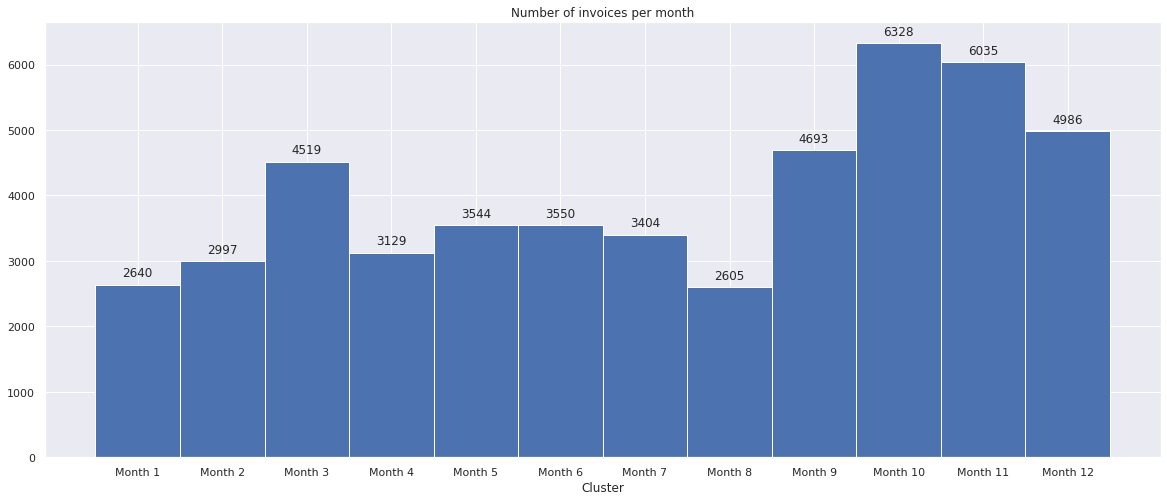

In [ ]:
# Plotting graph for buying pattern across different months in cluster 0
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Month'], bins=12)
plt.xlabel("Cluster")
plt.title("Number of invoices per month")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Month {}".format(x) for x in range(1, 13)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [ ]:
# customers buying pattern in different year
temp['Year'] = cluster0[cluster0['Month']==12]['InvoiceDate'].map(lambda x: x.year)
temp['Year'].value_counts()

2010.0    4630
2011.0     356
Name: Year, dtype: int64

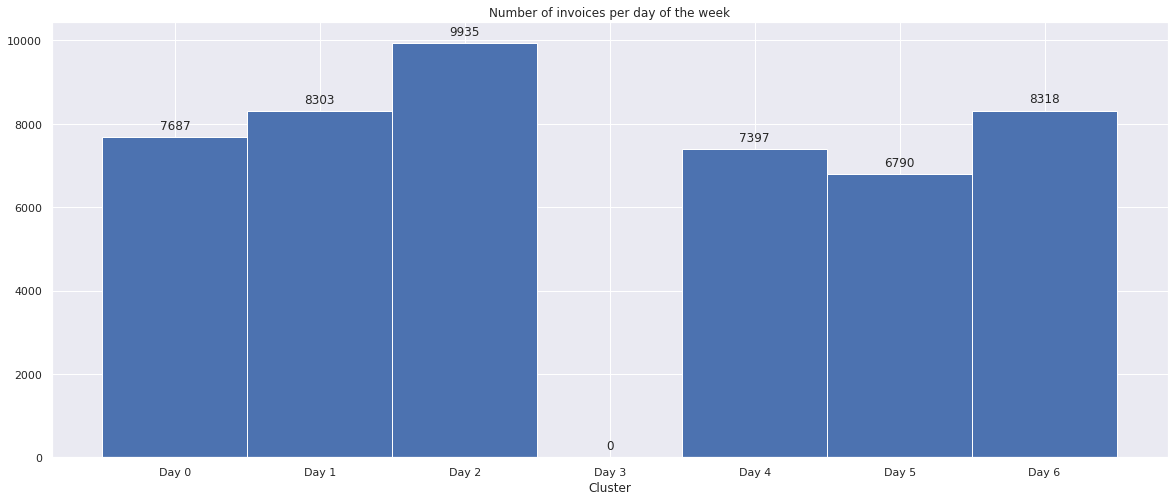

In [ ]:
# Plotting Graph for customers buying pattern in different year
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(cluster0['Day_of_week'], bins=7)
plt.xlabel("Cluster")
plt.title("Number of invoices per day of the week")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Day {}".format(x) for x in range(0, 7)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

Key figures:

- Mean Amount Spent : 17.03
- Max Amount Spent : 3202.92

- Quantity : 11.00

- Mean UnitPrice : 3.24
- Frequency : 37.33
- Recency : 134.95
- Monetary : 443.909342

Top 10 Products

- WHITE HANGING HEART T-LIGHT HOLDER    339
- REGENCY CAKESTAND 3 TIER              268
- ASSORTED COLOUR BIRD ORNAMENT         235
- PARTY BUNTING                         229
- REX CASH+CARRY JUMBO SHOPPER          202
- NATURAL SLATE HEART CHALKBOARD        161
- BAKING SET 9 PIECE RETROSPOT          155
- HEART OF WICKER SMALL                 150
- SET OF 3 CAKE TINS PANTRY DESIGN      147
- HEART OF WICKER LARGE                 146